In [4]:
import json
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # matplotlib is not installed automatically
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
success_list = ["Central_valley", "China (Mid-lat humid)", "South Dacota (Mid-lat dry)", "Argentina (Mid-lat dry)", "Russia (Mid-lat humid)"]

home_dir = r"G:\Araki\SMSigxSMAP"
input_path = r"3_data_out\exp_plots"
output_path = r"3_data_out\exp_plots"


In [7]:

# Create an empty list to store the dataframes
dfs = []

# Loop through the target stations
for station in success_list:
    # Construct the path to the file
    filepath = os.path.join(home_dir, input_path, station, 'event_df_with_curvefit.csv')
    # Read the file into a pandas dataframe
    df = pd.read_csv(filepath)
    # Add a new column with the station name
    df['station'] = station
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all the dataframes together
result = pd.concat(dfs)

In [10]:
result = result.reset_index(drop=True)
result.head()


,Unnamed: 0,event_start,event_end,soil_moisture_daily,precip,PET,delta_theta,theta_w,tau,r_squared,opt_drydown,mean_PET,event_length,station
0,0,2015-04-08,2015-04-15,"[0.1938336, 0.1269245, 0.1052133, 0.1003775, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[3.47952, 2.94221, 3.96109, 4.97817, 4.31703, ...",0.142930,0.043795,2.790355,0.920730,"[0.18412186129333072, 0.14185660578008907, 0.1...",4.321578,8,Central_valley
1,1,2015-11-10,2015-11-15,"[0.2465152, 0.1989249, 0.178879, 0.1621606, 0....","[11.55168, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.17364, 1.41344, 1.50433, 1.57533, 1.92462, ...",0.107632,0.145349,1.731806,0.992203,"[0.2456759903192415, 0.20166634886142035, 0.17...",1.445333,6,Central_valley
2,2,2016-03-06,2016-03-11,"[0.3282443, nan, 0.2832519, 0.2276171, 0.20248...","[8.303040000000001, 0.0, 0.19872, 0.0, 0.0, 0.0]","[2.44018, 1.668, 2.43951, 2.70936, 3.38876, 1....",0.223324,0.041967,7.018691,0.961701,"[0.3348783831209105, 0.2622507955542884, 0.232...",2.318993,6,Central_valley
3,3,2016-03-12,2016-03-29,"[0.2832137, 0.2196951, 0.2306282, 0.208455, 0....","[0.93312, 0.0, 0.52704, 0.0, 0.0, 0.0, 0.0, 0....","[1.9586, 1.67819, 2.50363, 2.854, 3.11875, 3.5...",0.101425,0.059474,5.979991,0.959894,"[0.2754369736054637, 0.2421808689961992, 0.214...",3.293423,18,Central_valley
4,4,2016-04-28,2016-05-05,"[0.1584084, 0.0947883, 0.0556612, nan, nan, 0....","[1.296, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[4.37069, 4.76817, 5.09533, 4.72832, 5.0143, 4...",0.118810,0.053136,0.920828,0.940103,"[0.15931683672951874, 0.08897945003483307, 0.0...",4.607331,8,Central_valley


In [14]:
import ast

# Convert the string in 'PET' column to a list
result['PET'] = result['PET'].apply(ast.literal_eval)

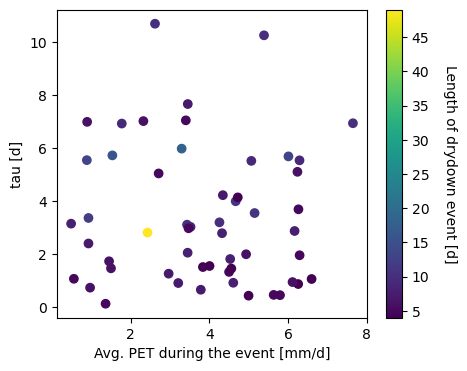

In [20]:
import matplotlib.colors as colors
result['mean_PET'] = result['PET'].apply(np.mean)
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['tau'], c=result['event_length']) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Length of drydown event [d]', rotation=270, labelpad=20)
fig.savefig(os.path.join(home_dir, output_path, f'all_stations_tau_vs_PET.png'))

In [ ]:
result['mean_LAI'] = result['LAI'].apply(np.mean)
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['tau'], c=result['mean_LAI']) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('LAI [-]]', rotation=270, labelpad=20)
fig.savefig(os.path.join(home_dir, output_path, f'all_stations_tau_vs_PET_vs_LAI.png'))

In [ ]:
result['mean_NDVI'] = result['NDVI'].apply(np.mean)
fig, ax = plt.subplots(1,1, figsize=(5, 4))
sc = ax.scatter(result['mean_PET'], result['tau'], c=result['mean_NDVI']) #, norm=colors.LogNorm())
ax.set_xlabel('Avg. PET during the event [mm/d]')
ax.set_ylabel('tau [d]')
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('NDVI [-]]', rotation=270, labelpad=20)
fig.savefig(os.path.join(home_dir, output_path, f'all_stations_tau_vs_PET_vs_NDVI.png'))